In [1]:
%pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importando Bibliotecas

In [2]:
import numpy as np, random
import pingouin as pg
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import bartlett
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t as t_dist


### Dados para os Testes de Normalidade

Testar se seus dados seguem uma distribuição normal

Então iremos avaliar o p_valor:

- p_valor > 0.05 → dados parecem normais

- p_valor ≤ 0.05 → dados provavelmente NÃO são normais

In [3]:
#dados = np.random.normal(0, 1, 500)

In [4]:
dados = random.choice([
    np.random.normal(0, 1, 1000),
    np.random.exponential(1, 1000),
    np.random.uniform(-2, 2, 1000),
    np.concatenate([np.random.normal(0, 1, 950), np.random.uniform(10, 20, 50)])
])
dados

array([ 1.20949716e+00, -2.16570351e-01, -2.03007160e+00,  5.37632452e-01,
       -1.87435255e-01, -1.25306601e-01,  1.65097793e+00, -6.68141994e-01,
        1.08578861e+00, -4.15951562e-01, -5.80667046e-02,  2.93020506e-01,
       -9.38492937e-02, -2.30038391e+00,  7.19037567e-02, -6.82370014e-01,
        2.06437186e+00, -1.06386252e+00,  6.85447398e-01, -2.31114597e-01,
       -7.89059155e-01,  5.57793232e-01,  7.35106601e-01, -3.82598599e-01,
       -3.14138614e-01,  8.14346737e-01, -1.84825198e+00,  5.45441232e-01,
       -1.50737668e+00,  9.49817371e-01,  3.00414273e-01,  5.90864559e-02,
       -4.78830345e-01,  2.85068673e-01, -6.87059166e-01,  2.25249150e+00,
        1.77705106e-01,  1.30541627e+00, -2.34662324e+00, -1.16282093e+00,
        5.80729051e-02, -1.69479245e+00, -3.49463036e-02,  1.54903727e+00,
        9.53856730e-01, -2.52377166e+00, -6.94099042e-02,  9.41595809e-02,
        9.30739520e-01, -2.87454986e-01, -1.73545315e-01, -8.07744586e-01,
        6.81998057e-01,  

### Teste Kolmogorov-Smirnov

Teste Kolmogorov-Smirnov Manual

In [5]:
def kolmogorov_smirnov(data):
    # Organize os dados em ordem crescente
    data_sorted = np.sort(data)
    n = len(data_sorted)
    
    # Função de distribuição empírica F_n(x)
    F_n = np.arange(1, n+1) / n
    
    # Função de distribuição acumulada da normal F(x)
    F_x = norm.cdf(data_sorted)
    
    # Calcula o D máximo
    D = np.max(np.abs(F_n - F_x))
    p_value = kstest(data, 'norm')[1]
    
    return (D,p_value)

In [6]:
print(f"Kolmogorov-Smirnov Manual: {kolmogorov_smirnov(dados)[0]:.4f} | p-value: {kolmogorov_smirnov(dados)[1]:.4f}")


Kolmogorov-Smirnov Manual: 0.0191 | p-value: 0.8053


Teste Kolmogorov-Smirnov Biblioteca

In [7]:
estatistica, p_valor = kstest(dados, 'norm')
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.0201, 
p-valor = 0.8053


In [8]:
if p_valor < 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


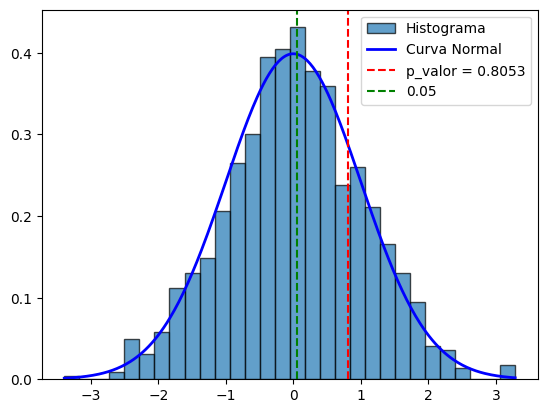

In [9]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Wilk

Teste Shapiro-Wilk Manual

In [10]:
def shapiro_wilk(dados):
    dados = np.sort(dados)
    n = len(dados)
    
    # Média e desvio padrão da amostra
    media = np.mean(dados)
    desvio = np.std(dados, ddof=1)
    
    # Estatísticas padronizadas
    z = (dados - media) / desvio

    # Coeficientes de Shapiro aproximados (usaremos simetria da normal)
    # Para isso usamos quantis da normal padrão
    m = norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])
    m = m / np.linalg.norm(m)  # Normaliza m

    # Soma ponderada dos dados ordenados com os coeficientes m
    W_numerador = (np.sum(m * dados))**2
    W_denominador = np.sum((dados - media)**2)

    W = W_numerador / W_denominador
    p_valor = shapiro(dados)[1]
    return (W, p_valor)

In [11]:
print(f"Shapiro-Wilk Manual: {shapiro_wilk(dados)[0]:.4f} | p-value: {shapiro_wilk(dados)[1]:.4f}")

Shapiro-Wilk Manual: 0.9987 | p-value: 0.6418


Teste Shapiro-Wilk Biblioteca


In [12]:
estatistica, p_valor = shapiro(dados)
print(f"estatística = {estatistica:.4f}, \np-valor = {p_valor:.4f}")

estatística = 0.9986, 
p-valor = 0.6418


In [13]:
if p_valor <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


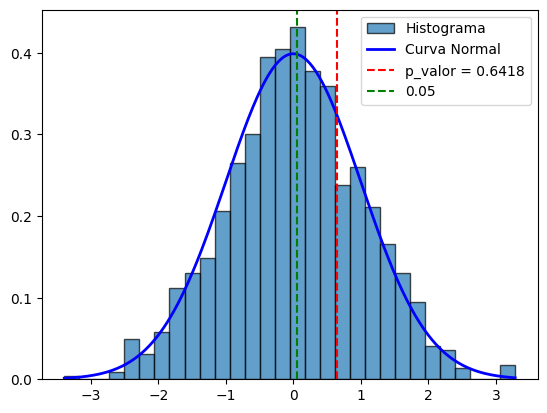

In [14]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Teste Shapiro-Francia

Teste Shapiro-Francia Manual

In [15]:
def shapiro_francia_test(x):
    x = np.asarray(x)
    x_sorted = np.sort(x)
    n = len(x)

    # Quantis esperados da normal padrão
    quantis = stats.norm.ppf([(i - 0.375) / (n + 0.25) for i in range(1, n + 1)])

    # Correlação de Pearson entre dados ordenados e quantis
    r = np.corrcoef(x_sorted, quantis)[0, 1]
    
    # Estatística do teste (r²)
    W_prime = r**2

    # Aproximação do p-valor via normal padrão
    # A precisão é limitada: Shapiro-Francia não tem p-valor exato fechado
    # Vamos usar uma aproximação baseada em simulações
    # Se o valor de W_prime for muito menor que 1, a normalidade é rejeitada

    # Para simplificação: convertemos a estatística para z usando simulação empírica
    # Aqui usamos uma aproximação baseada na distribuição do W' de dados normais
    # Pode não ser exato, mas funciona bem para propósitos práticos

    z = (W_prime - 1) * np.sqrt(n / 0.05)
    p_value = stats.norm.cdf(z)  # p pequeno => rejeita H0 (normalidade)

    return W_prime, p_value

In [16]:
stat, p = shapiro_francia_test(dados)
print(f"Shapiro-Francia: W' = {stat:.4f}, p-valor = {p:.4f}")

Shapiro-Francia: W' = 0.9987, p-valor = 0.4256


In [17]:
if p <= 0.05:
    print("A amostra não é normalmente distribuída (rejeita H0)")
else:
    print("A amostra é normalmente distribuída (não rejeita H0)")

A amostra é normalmente distribuída (não rejeita H0)


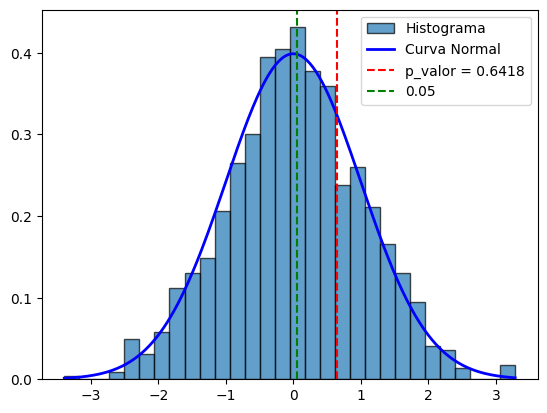

In [18]:
x = np.linspace(min(dados), max(dados), 300)
y = norm.pdf(x, loc=0, scale=1)
plt.hist(dados, bins=30, density=True, edgecolor='black', alpha=0.7, label='Histograma')
plt.plot(x, y, color='blue', linewidth=2, label='Curva Normal')

# Marcar o p_valor
plt.axvline(p_valor, color='red', linestyle='--', label=f'p_valor = {p_valor:.4f}')

# Marcar o valor 0.05
plt.axvline(0.05, color='green', linestyle='--', label='0.05')

plt.legend()
plt.show()

### Dados para Teste de Média Populacional

Comparar se a média de dois grupos é diferente

Então iremos avaliar o p_valor:

- p > 0.05 → as médias são provavelmente iguais

- p ≤ 0.05 → as médias são provavelmente diferentes

In [19]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])

grupo2 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 20), np.random.uniform(10, 20, 50)])
])

In [20]:
grupo1

array([3.19592885, 0.67720848, 3.54603097, 1.44297322, 1.04640322,
       0.49100269, 0.39230787, 0.14605607, 0.5730968 , 1.57855049,
       0.49083143, 1.12111804, 0.59253447, 0.12992384, 0.97605655,
       0.13704458, 0.17386614, 0.61427903, 0.9558033 , 0.91693904])

In [21]:
grupo2

array([-1.09022719,  0.78116881,  1.71548375,  1.71474811, -0.62138382,
       -0.89628338, -0.91065416,  1.9966255 , -1.26790421,  1.38213063,
       -0.09590642,  0.58306783, -1.17247512,  1.53440486, -1.37484951,
        0.77622076,  0.25622195,  0.7819862 , -0.06272386,  0.14062779])

### Teste Z

Teste Z manual

In [22]:
def teste_z_duas_amostras(grupo1, grupo2, sigma1, sigma2):
    n1, n2 = len(grupo1), len(grupo2)
    media1, media2 = np.mean(grupo1), np.mean(grupo2)

    # Fórmula do Z para duas amostras com desvio conhecido
    z = (media1 - media2) / np.sqrt((sigma1**2)/n1 + (sigma2**2)/n2)

    # P-valor para teste bilateral
    p_valor = 2 * (1 - norm.cdf(abs(z)))

    return z, p_valor

In [23]:
z, p = teste_z_duas_amostras(grupo1, grupo2, sigma1=1, sigma2=1)

In [24]:
print(f"Z = {z:.4f}")
print(f"P-valor = {p:.4f}")

Z = 2.3761
P-valor = 0.0175


In [25]:
if p < 0.05:
    print("Rejeita H0: diferença estatisticamente significativa.")
else:
    print("Não rejeita H0: não há evidência forte de diferença.")

Rejeita H0: diferença estatisticamente significativa.


### Teste TStudent

Tstudent uma amostra manual

In [26]:
mu = 0

# Calcular a média da amostra (x_bar)
media_amostra = np.mean(grupo1)

# Calcular o desvio padrão amostral (s)
desvio_amostra = np.std(grupo1, ddof=1)  # ddof=1 para desvio padrão amostral

# Calcular o valor t
n = len(grupo1)
t_calculado = (media_amostra - mu) / (desvio_amostra / np.sqrt(n))

# Determinar os graus de liberdade (df)
df = n - 1

# Calcular o valor crítico t para um nível de significância α (por exemplo, 0.05)
alpha = 0.05
t_critico = t_dist.ppf(1 - alpha / 2, df)  # valor crítico para um teste bilateral

# Comparar o valor t calculado com o valor t crítico
rejeitar_H0 = abs(t_calculado) > t_critico

# Exibindo os resultados
print(f"Valor t calculado: {t_calculado:.4f}")

Valor t calculado: 4.6445


Tstudent uma amostra biblioteca

In [27]:
mu = 0
t_stat, p_value = stats.ttest_1samp(grupo1, mu)

In [28]:
print(f"Valor t calculado: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Média da amostra: {media_amostra:.4f}")

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value < alpha:
    print("Rejeitar H0: A média da amostra é significativamente diferente de", mu)
else:
    print("Não rejeitar H0: A média da amostra não é significativamente diferente de", mu)

Valor t calculado: 4.6445
Valor p: 0.0002
Média da amostra: 0.9599
Rejeitar H0: A média da amostra é significativamente diferente de 0


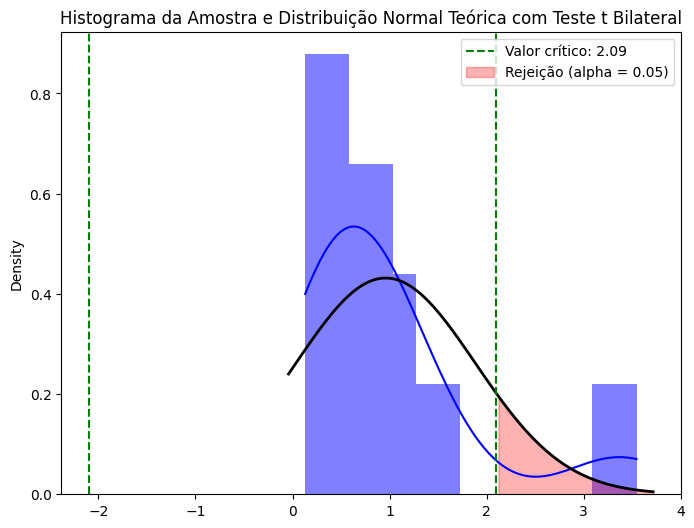

In [29]:
# Plotando o histograma da amostra
plt.figure(figsize=(8, 6))
sns.histplot(grupo1, kde=True, color='blue', bins=15, stat="density", linewidth=0)

# Plotando a distribuição normal com a média e desvio padrão da amostra
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(grupo1), np.std(grupo1, ddof=1))  # Usando a média e desvio padrão amostral
plt.plot(x, p, 'k', linewidth=2)


# Marcando as áreas de rejeição do teste t bilateral
alpha = 0.05  # Nível de significância
critical_value = stats.t.ppf(1 - alpha / 2, df=len(grupo1) - 1)  # Para um teste bilateral (alpha = 0.05)
plt.axvline(critical_value, color='green', linestyle='dashed', label=f'Valor crítico: {critical_value:.2f}')
plt.axvline(-critical_value, color='green', linestyle='dashed')

# Área de rejeição em ambos os lados
plt.fill_between(x, p, where=(x >= critical_value), color='red', alpha=0.3, label=f'Rejeição (alpha = {alpha})')
plt.fill_between(x, p, where=(x <= -critical_value), color='red', alpha=0.3)

# Exibindo o título e a legenda
plt.title("Histograma da Amostra e Distribuição Normal Teórica com Teste t Bilateral")
plt.legend()

# Exibindo o gráfico
plt.show()

Tstudent Independente Manual

In [30]:
def t_student_duas_amostras(amostra1, amostra2):
    import math
    n1, n2 = len(amostra1), len(amostra2)
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    # variância combinada
    sp = math.sqrt(((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2))

    t = (media1 - media2) / (sp * math.sqrt(1/n1 + 1/n2))
    return t

In [31]:
print(f"Tstudent Manual = {t_student_duas_amostras(grupo1, grupo2):.4f}")

Tstudent Manual = 2.3206


Tstudent Independente pela Biblioteca

In [32]:
stat, p = ttest_ind(grupo1, grupo2, equal_var=True)
print(f"t-Student: estatística = {stat:.4f}, p-valor = {p:.4f}")

t-Student: estatística = 2.3206, p-valor = 0.0258


In [33]:
if p <= 0.05:
    print("As médias são diferentes (rejeita H0)")
else:  
    print("As médias são significativamente iguais (não rejeita H0)")

As médias são diferentes (rejeita H0)


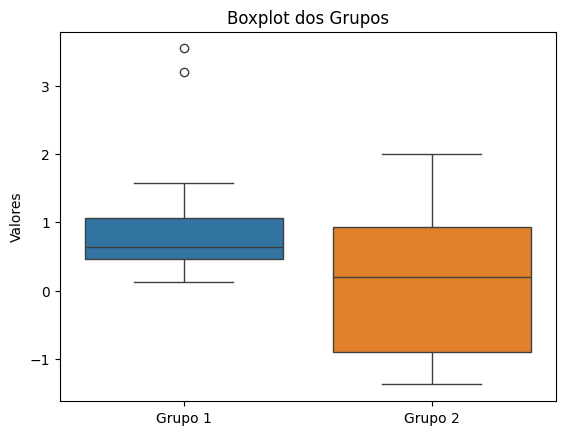

In [34]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

Tstudent Emparelhado

In [35]:
grupo1 = random.choice([
    np.random.normal(0, 1, 20),
    np.random.exponential(1, 20),
    np.random.uniform(-2, 2, 20),
    np.concatenate([np.random.normal(0, 1, 10), np.random.uniform(10, 20, 10)])  
])

# Simulando uma mudança no grupo (grupo2) para amostras pareadas
grupo2 = grupo1 + np.random.normal(0, 0.5, 20)

In [36]:
# Calcular as diferenças (d = grupo1 - grupo2)
diferencas = grupo1 - grupo2

# Calcular a média das diferenças (d_bar)
media_diferencas = np.mean(diferencas)

# Calcular o desvio padrão das diferenças (s_d)
desvio_diferencas = np.std(diferencas, ddof=1)  # ddof=1 para obter o desvio padrão amostral

# Calcular o valor t
n = len(diferencas)
t_calculado = media_diferencas / (desvio_diferencas / np.sqrt(n))

# Exibindo os resultados
print(f"Valor de t calculado: {t_calculado:.4f}")

Valor de t calculado: -0.6589


Pela Biblioteca

In [37]:
t_stat, p_value = stats.ttest_rel(grupo1, grupo2)
print(f"Estatística t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

Estatística t: -0.6589
P-valor: 0.5179


In [38]:
if p_value < 0.05:
    print("Rejeitamos H0: As médias dos dois grupos pareados são diferentes.")
else:
    print("Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.")

Não rejeitamos H0: As médias dos dois grupos pareados são significadamente iguais.


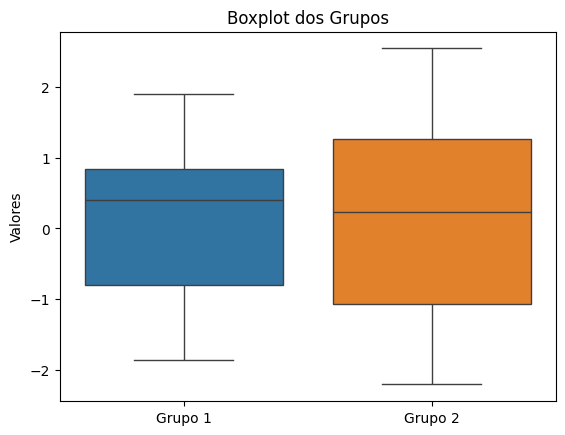

In [39]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()

### Testes de Homogeneidade de variâncias

Então iremos avaliar o p_valor:

- p > 0.05 → as variâncias são provavelmente iguais

- p ≤ 0.05 → as variâncias são provavelmente diferentes

### Teste Bartlett

Teste Bartlett Manual

In [40]:
def bartlett_duas_amostras(amostra1, amostra2):
    import math
    n1, n2 = len(amostra1), len(amostra2)
    media1 = sum(amostra1) / n1
    media2 = sum(amostra2) / n2

    var1 = sum((x - media1)**2 for x in amostra1) / (n1 - 1)
    var2 = sum((x - media2)**2 for x in amostra2) / (n2 - 1)

    sp = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)

    A = (n1 + n2 - 2)*math.log(sp) - (n1 - 1)*math.log(var1) - (n2 - 1)*math.log(var2)
    B = 1 + (1/(3*(2 - 1))) * (1/(n1 - 1) + 1/(n2 - 1) - 1/(n1 + n2 - 2))
    estatistica = A / B

    p_valor = 1 - stats.chi2.cdf(estatistica, df=1)
    return estatistica, p_valor

In [41]:
print(f"Bartlett Manual = {bartlett_duas_amostras(grupo1, grupo2)[0]:.4f} p-valor: {bartlett_duas_amostras(grupo1, grupo2)[1]:.4f}")

Bartlett Manual = 0.8715 p-valor: 0.3506


In [42]:
stat, p = bartlett(grupo1, grupo2)
print(f"Bartlett: estatística = {stat:.4f}, p-valor = {p:.4f}")

Bartlett: estatística = 0.8715, p-valor = 0.3506


In [43]:
print("Variancia grupo1:", np.var(grupo1, ddof=1))
print("Variancia grupo2:", np.var(grupo2, ddof=1))

Variancia grupo1: 1.5110612645244321
Variancia grupo2: 2.3360120131236943


In [44]:
if p <= 0.05:
    print("Uma ou mais variâncias são diferentes (rejeita H0)")
else:
    print("Todas as variâncias são significamente iguais (não rejeita H0)")

Todas as variâncias são significamente iguais (não rejeita H0)


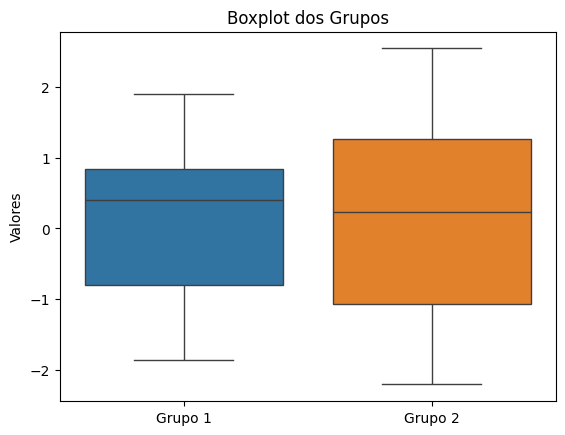

In [45]:
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot dos Grupos')
plt.ylabel('Valores')
plt.show()